In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import platform

In [2]:
import os, warnings
warnings.filterwarnings(action='ignore')

In [3]:
cpi = pd.read_csv('covid19_cpi.csv')

cpi.head()

,국가,ISO3,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,치료중_합계,치료중1일,위중증_합계,위중증1일,사망자합계,사망자1일,완치합계,완치1일,Country,CPI score 2020
0,미국🇺🇸,USA,1.8,83.6,104032,331002651,34419981,13922.0,5034090.0,-43487.0,3939.0,-18.0,617483,317.0,28768408.0,57092.0,United States of America,67
1,인도🇮🇳,IND,1.3,96.5,21760,1380004385,30002691,37399.0,662304.0,-18984.0,8944.0,NaN,389661,833.0,28950726.0,55550.0,India,40
2,브라질🇧🇷,BRA,2.8,90.6,84949,212559417,17969806,41878.0,1178597.0,-27175.0,8318.0,NaN,502817,899.0,16288392.0,68154.0,Brazil,38
3,프랑스🇫🇷,FRA,1.9,96.7,88244,65273511,5757798,487.0,80626.0,-9361.0,1655.0,-48.0,110778,40.0,5566394.0,9808.0,France,69
4,터키🇹🇷,TUR,0.9,97.4,63811,84339067,5375593,5294.0,88626.0,150.0,808.0,-5.0,49236,51.0,5237731.0,5093.0,Turkey,40


In [7]:
cpi.rename(columns={'발생률':'100만명 당 발생률'},inplace=True)

In [10]:
cpi.columns

Index(['국가', 'ISO3', '치명(%)', '완치(%)', '100만명 당 발생률', '인구수', '확진자_합계', '확진자1일',
       '치료중_합계', '치료중1일', '위중증_합계', '위중증1일', '사망자합계', '사망자1일', '완치합계', '완치1일',
       'Country', 'CPI score 2020'],
      dtype='object')

In [76]:
cases_per_mil = []
for i in cpi["100만명 당 발생률"]:
    try:
        cases_per_mil.append(int(i)/10000)
    except:
        cases_per_mil.append('-')
cpi["cases_per_million"]=cases_per_mil
cpi

,국가,ISO3,치명(%),완치(%),100만명 당 발생률,인구수,확진자_합계,확진자1일,치료중_합계,치료중1일,위중증_합계,위중증1일,사망자합계,사망자1일,완치합계,완치1일,Country,CPI score 2020,cases_per_million
0,미국🇺🇸,USA,1.8,83.6,104032,331002651,34419981,13922.0,5034090.0,-43487.0,3939.0,-18.0,617483,317.0,28768408.0,57092.0,United States of America,67,10.4032
1,인도🇮🇳,IND,1.3,96.5,21760,1380004385,30002691,37399.0,662304.0,-18984.0,8944.0,NaN,389661,833.0,28950726.0,55550.0,India,40,2.176
2,브라질🇧🇷,BRA,2.8,90.6,84949,212559417,17969806,41878.0,1178597.0,-27175.0,8318.0,NaN,502817,899.0,16288392.0,68154.0,Brazil,38,8.4949
3,프랑스🇫🇷,FRA,1.9,96.7,88244,65273511,5757798,487.0,80626.0,-9361.0,1655.0,-48.0,110778,40.0,5566394.0,9808.0,France,69,8.8244
4,터키🇹🇷,TUR,0.9,97.4,63811,84339067,5375593,5294.0,88626.0,150.0,808.0,-5.0,49236,51.0,5237731.0,5093.0,Turkey,40,6.3811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,브루나이🇧🇳,BRN,1.2,95.7,585,437479,256,1.0,8.0,NaN,NaN,NaN,3,NaN,245.0,1.0,Brunei Darussalam,60,0.0585
174,도미니카 연방🇩🇲,DMA,-,99.0,2653,71986,191,NaN,2.0,NaN,NaN,NaN,0,NaN,189.0,NaN,Dominica,55,0.2653
175,그레나다🇬🇩,GRD,0.6,99.4,1431,112523,161,NaN,0.0,NaN,NaN,NaN,1,NaN,160.0,NaN,Grenada,53,0.1431
176,솔로몬 제도🇸🇧,SLB,-,100.0,29,686884,20,NaN,0.0,NaN,NaN,NaN,0,NaN,20.0,NaN,Solomon Islands,42,0.0029


In [78]:
mask1 = (cpi.cases_per_million != '-')
cpi = cpi.loc[mask1,:]
cpi.head()

,국가,ISO3,치명(%),완치(%),100만명 당 발생률,인구수,확진자_합계,확진자1일,치료중_합계,치료중1일,위중증_합계,위중증1일,사망자합계,사망자1일,완치합계,완치1일,Country,CPI score 2020,cases_per_million
0,미국🇺🇸,USA,1.8,83.6,104032,331002651,34419981,13922.0,5034090.0,-43487.0,3939.0,-18.0,617483,317.0,28768408.0,57092.0,United States of America,67,10.4032
1,인도🇮🇳,IND,1.3,96.5,21760,1380004385,30002691,37399.0,662304.0,-18984.0,8944.0,NaN,389661,833.0,28950726.0,55550.0,India,40,2.176
2,브라질🇧🇷,BRA,2.8,90.6,84949,212559417,17969806,41878.0,1178597.0,-27175.0,8318.0,NaN,502817,899.0,16288392.0,68154.0,Brazil,38,8.4949
3,프랑스🇫🇷,FRA,1.9,96.7,88244,65273511,5757798,487.0,80626.0,-9361.0,1655.0,-48.0,110778,40.0,5566394.0,9808.0,France,69,8.8244
4,터키🇹🇷,TUR,0.9,97.4,63811,84339067,5375593,5294.0,88626.0,150.0,808.0,-5.0,49236,51.0,5237731.0,5093.0,Turkey,40,6.3811


In [35]:
from matplotlib import font_manager, rc
import matplotlib
import platform

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
matplotlib.rcParams['axes.unicode_minus'] = False

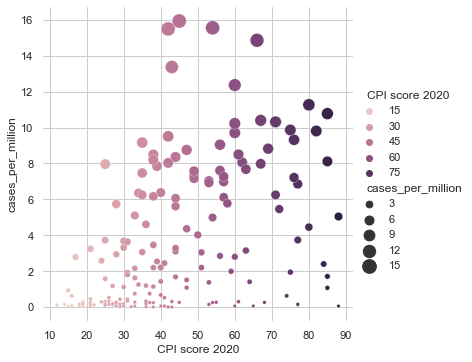

In [87]:
sns.set_theme(style="whitegrid")
#컬러맵
# cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

g = sns.relplot(
    data=cpi,
    x="CPI score 2020", y="cases_per_million",
    hue="CPI score 2020", size="cases_per_million",
#     palette=cmap, 
    sizes=(10, 200),
)

# g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

AttributeError: 'FacetGrid' object has no attribute 'ylim'

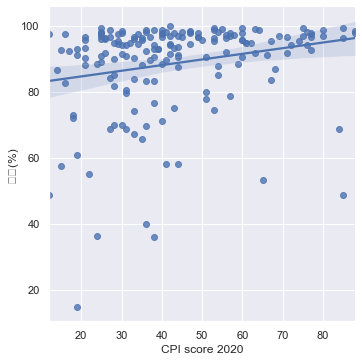

In [43]:
sns.set_theme()

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=cpi,
    x="CPI score 2020", y="완치(%)", 
#     hue="완치(%)",
    height=5,
#     set(xlim=(0,100),ylim=(50,100))
)

g.ylim(50, 100)
# ax.set_xticks(range(1,32))

# Use more informative axis labels than are provided by default
g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")

In [33]:
plt.rcParams['font.family'] = 'NanumGothic'

In [55]:
sns.set_theme(style="ticks")
sns.pairplot(cpi1, hue='CPI score 2020', palette='husl')

ValueError: Number of rows must be a positive integer, not 0

<Figure size 0x0 with 0 Axes>

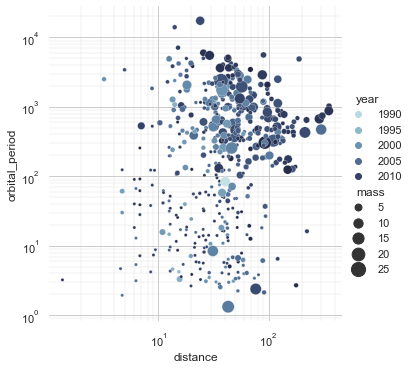

In [12]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the example planets dataset
planets = sns.load_dataset("planets")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=planets,
    x="distance", y="orbital_period",
    hue="year", size="mass",
    palette=cmap, sizes=(10, 200),
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)